# Code for applying Naive bayes's Algorithm on Tumor Dataset

## For Understanding naive bayes algorithm first we need to Understand what is bayes theorem

Lets say we have two events event A and B calculating the conditional probability for both of them are

Equation 1 and  2

\begin{equation}
P(A|B) = \frac{P(B \cap A)}{P(B)}           
\end{equation}

\begin{equation}
P(B|A) = \frac{P(A \cap B)}{P(A)}
\end{equation}

as we know ,


\begin{equation}
P(A \cap B) = P(B \cap A)
\end{equation}

so,

\begin{equation}
 P(A \cap B) = P(B|A)*P(A) 
\end{equation}

\begin{equation}
P(B \cap A) = P(A|B)*P(B) 
\end{equation}

equating both of them we get Bayes rule

\begin{equation}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\end{equation}

In Naive Bayes algorithm we try to find the posterior probability for each class label and whose prosterior probability will be maximum among all labels we will say that the tumor belongs to that class or label .Lets see what do i mean by posterior probability

P(A|B) is Posterior probability and P(B|A) is liklihood Probability and P(A) is prior probabilty for calculating posterior probabilty we only need to calculate two probabilities that are liklihood and prior other probabilities can be calculated using these.<br>
How do we start with the Algorithm??<br>
For that first we convert our data into three parts that is<br>
- Training Data(70% part to the entire data)<br>
- Cross validation Data(10% part to the entire data)<br>
- Testing Data(20% part to the entire data)<br>

Lets assume we have two features radius_mean and texture_mean and the class labels are M(melignant),B(beningn) that is binomial so we need to calculate prosterior probabilty for class M and B<br>
How can we calculate that when we have two features in account<br>
understand this using an example ,<br>
we always have features for an example and we try to calculate the probability of class on a condition features(feature vector)<br>
consider one example(Tumor) having radius_mean= __x__ and texture_mean = __y__<br>
so our posterior probability for both the classes given the features are,

\begin{equation}
P(diag=B|radius\_mean=x \cap texture\_mean=y) = \frac{P(radius\_mean=x \cap texture\_mean=y|diag=B)*P(B)}{P(radius\_mean=x \cap texture\_mean=y|diag=B)*P(B)+P(radius\_mean = x \cap texture\_mean=y|diag=M)*P(M)}
\end{equation}

\begin{equation}
P(diag=M|radius\_mean=x \cap texture\_mean=y) = \frac{P(radius\_mean=x \cap texture\_mean=y|diag=M)*P(M)}{P(radius\_mean=x \cap texture\_mean=y|diag=B)*P(B)+P(radius\_mean = x \cap texture\_mean=y|diag=M)*P(M)}
\end{equation}

as we have written the posterior probability formula for both the classes now out of these two posterior probability for which class is bigger in magnitude means that when we have feature values x and y it belongs to that class
in other words<br>if
\begin{equation}
P(diag=B|radius\_mean=x \cap texture\_mean=y) > P(diag=M|radius\_mean=x \cap texture\_mean=y)
\end{equation}

then our __Tumor belongs to B class__

and if
\begin{equation}
P(diag=M|radius\_mean=x \cap texture\_mean=y) > P(diag=B|radius\_mean=x \cap texture\_mean=y)
\end{equation}
Then our __Tumor belongs to  M class__ 

### But How to calculate liklihood probability and prior probability

Prior Probability is easier to calculate <br>
prior probabilty of B is (frequency of tumor having class __B__ in training data)/total no of training examples<br>
\begin{equation}
P(diag=B) = \frac{\text{Frequency of B in training data} }{\text{Total training examples}}
\end{equation}

prior probabilty of M is (frequency of tumor having class __M__ in training data)/total no of training examples<br>
\begin{equation}
P(diag=M) = \frac{\text{Frequency of M in training data} }{\text{Total training examples}}
\end{equation}

For liklihood probability for __B__ we need to calculate
\begin{equation}
P(radius\_mean=x \cap texture\_mean=y|diag=B)
\end{equation}
<br>
We called this algorithm as NAIVE its because we have taken a naive assumption that all of our features are independent to each other, so the upper equation can be written as<br>
\begin{equation}
P(radius\_mean=x |diag=B) * P(texture\_mean=y|diag=B)
\end{equation}
now,

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Tumor_data.csv")

In [3]:
data=data.iloc[:,1:5]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


In [4]:
#Enter the parameters by which you wanted to divide your data
Train_per=70
Cross_per=10
Test_per=20

In [5]:
#Dividing the data into 3 parts
Training_data=data.iloc[:int((Train_per/100)*len(data))]
Cross_validation_data=data.iloc[int((Train_per/100)*len(data)):int(((Train_per+Cross_per)/100)*len(data))]
Testing_data=data.iloc[int(((Train_per+Cross_per)/100)*len(data)):]

In [6]:
Training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


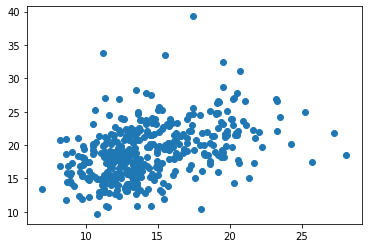

In [7]:
# the scatter plot beteen the two features 
plt.scatter(Training_data["radius_mean"],Training_data["texture_mean"])

In [8]:
Cross_validation_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
398,B,11.06,14.83,70.31
399,B,11.80,17.26,75.26
400,M,17.91,21.02,124.40
401,B,11.93,10.91,76.14
402,B,12.96,18.29,84.18


In [9]:
Testing_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
455,B,13.380,30.72,86.34
456,B,11.630,29.29,74.87
457,B,13.210,25.25,84.10
458,B,13.000,25.13,82.61
459,B,9.755,28.20,61.68


In [10]:
#differentaiting data class wise so that we can calculatetheir liklihood or prior probabilities
B_Training_data = Training_data[Training_data["diagnosis"] == "B"]
M_Training_data = Training_data[Training_data["diagnosis"] == "M"]

In [11]:
B_Training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
19,B,13.540,14.36,87.46
20,B,13.080,15.71,85.63
21,B,9.504,12.44,60.34
37,B,13.030,18.42,82.61
46,B,8.196,16.84,51.71


In [12]:
M_Training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


In [13]:
#prior probabilities 
P_diagnosis_B = B_Training_data.shape[0]/Training_data.shape[0]
P_diagnosis_M = M_Training_data.shape[0]/Training_data.shape[0]
print("Prior Probabilities of both B and M are---",P_diagnosis_B,P_diagnosis_M)

Prior Probabilities of both B and M are--- 0.5653266331658291 0.43467336683417085


In [14]:
#calculating the parameters which are required to calculate the liklihood probabilities because the are calculating
#using pdf and pdf requires the values of these parameters
#why mu_ because we are dealing with samples so we need to calculate best population param using samples bye MLE
mu_cap_B = np.array(B_Training_data.mean())
cov_B = np.array(B_Training_data.cov())
mu_cap_M = np.array(M_Training_data.mean())
cov_M = np.array(M_Training_data.cov())
print("Population parameters for B ",mu_cap_B,cov_B)
print("Population parameters for M ",mu_cap_M,cov_M)

Population parameters for B  [12.07644    17.12715556 77.58168889] [[  2.9974523    0.20174291  19.73035849]
 [  0.20174291  11.2881258    1.53650259]
 [ 19.73035849   1.53650259 130.8106891 ]]
Population parameters for M  [ 17.27416185  21.36098266 114.02965318] [[ 10.33747676   1.39954879  70.03339448]
 [  1.39954879  14.40388101   9.61636604]
 [ 70.03339448   9.61636604 478.85535569]]


In [19]:
B_Training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
19,B,13.540,14.36,87.46
20,B,13.080,15.71,85.63
21,B,9.504,12.44,60.34
37,B,13.030,18.42,82.61
46,B,8.196,16.84,51.71


In [17]:
cov_dem = B_Training_data.cov()
cov_dem

,radius_mean,texture_mean,perimeter_mean
radius_mean,2.997452,0.201743,19.730358
texture_mean,0.201743,11.288126,1.536503
perimeter_mean,19.730358,1.536503,130.810689


In [18]:
cov_dem = B_Training_data.iloc[:,1:].cov()
cov_dem

,radius_mean,texture_mean,perimeter_mean
radius_mean,2.997452,0.201743,19.730358
texture_mean,0.201743,11.288126,1.536503
perimeter_mean,19.730358,1.536503,130.810689


In [88]:
#checking the determinant is zero or not if zero or close to zero then our covariance matrix is singularr and our algo wont work furthur on
np.linalg.det(cov_B)

31.570887623640477

__Function which calculates the posterior probabilities for every class__

__Always keep in mind that its not compulsary to always use s.multivariate_normal.pdf it completely depends on data if our data is binomial then we use pdf for  binomial distribution and calculates parameters for that here we are dealing with normal data having more than one type of random variable thats why we are using Multivariate Normal PDF__

In [89]:
def predicated_category(x):
    B_liklihood = s.multivariate_normal.pdf(x,mu_cap_B,cov_B)*P_diagnosis_B
    M_liklihood = s.multivariate_normal.pdf(x,mu_cap_M,cov_M)*P_diagnosis_M
    
    B_posterior_probability = B_liklihood/(B_liklihood+M_liklihood)
    return (1-B_posterior_probability)   #it will return the posterior probability for melignant tumor as we have donr 1-B_posterior_prob

In [90]:
Cross_validation_data.iloc[:,1:]

,radius_mean,texture_mean,perimeter_mean
398,11.060,14.83,70.31
399,11.800,17.26,75.26
400,17.910,21.02,124.40
401,11.930,10.91,76.14
402,12.960,18.29,84.18
403,12.940,16.17,83.18
404,12.340,14.95,78.29
405,10.940,18.59,70.39
406,16.140,14.86,104.30
407,12.850,21.37,82.63


In [91]:
posterior_probability_m = predicated_category(Cross_validation_data.iloc[:,1:])

In [92]:
boolean_mask_predicted_cross = posterior_probability_m>0.5

In [93]:
boolean_mask_predicted_cross = np.uint(boolean_mask_predicted_cross)

In [94]:
boolean_mask_predicted_cross

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=uint32)

In [95]:
cross_val_class=Cross_validation_data["diagnosis"]

In [96]:
cross_val_class.replace(to_replace=["M","B"],value=[1,0],inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [97]:
cross_val_class = np.array(cross_val_class)
cross_val_class

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [98]:
accuracy_on_cross_val = np.count_nonzero(cross_val_class == boolean_mask_predicted_cross)/cross_val_class.shape[0]
accuracy_on_cross_val


0.9298245614035088

so the accuracy of the algorihtm on cross validation data is

In [99]:
Percent_accuracy_on_cross_val_data = accuracy_on_cross_val*100
Percent_accuracy_on_cross_val_data

92.98245614035088

In [100]:
Training_data_class = Training_data["diagnosis"]
Training_data_class.replace(to_replace=["M","B"],value=[1,0],inplace=True)
Training_data_class = np.array(Training_data_class)
Training_data_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [101]:
predicted_training = predicated_category(Training_data.iloc[:,1:])
predicted_training

array([1.        , 0.99967136, 0.9999805 , 0.99651127, 0.99999929,
       0.41355606, 0.99615996, 0.58706516, 0.99491244, 0.99628573,
       0.84161638, 0.81122193, 1.        , 0.94304366, 0.99998849,
       0.99726563, 0.27481866, 0.9998201 , 0.99993945, 0.03460896,
       0.10810842, 0.0070763 , 0.99205567, 0.99998835, 0.99375691,
       0.99999958, 0.99412632, 0.99858712, 0.99966332, 0.94809746,
       0.9999998 , 0.19961126, 0.99939781, 0.99999866, 0.98837759,
       0.98550238, 0.71127386, 0.0722918 , 0.81380271, 0.41551258,
       0.16258702, 0.21512523, 0.99999999, 0.43733265, 0.19915826,
       0.99989064, 0.02557259, 0.1513314 , 0.0202484 , 0.21175852,
       0.08280562, 0.04770015, 0.03581319, 0.99908248, 0.51035466,
       0.0309642 , 0.99838881, 0.47319392, 0.10329441, 0.00853292,
       0.01029319, 0.0622907 , 0.99989884, 0.01427408, 0.36470254,
       0.93830805, 0.05109131, 0.03367352, 0.04740852, 0.03068706,
       0.99856843, 0.12270217, 0.99979539, 0.19324425, 0.02410

In [102]:
predicted_training_values = predicted_training>0.5   #if >0.5 then trure else false
predicted_training_values = np.uint(predicted_training_values)
predicted_training_values

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [103]:
# comparing values of predicted values for training class vs actual values
Training_data_accuracy = np.count_nonzero(Training_data_class== predicted_training_values)/Training_data.shape[0]

In [104]:
#calculating accuracy on training data
Training_data_accuracy*100

90.45226130653266

Now lets see the accuracy on testing data

In [105]:
Testing_data_class = Testing_data["diagnosis"]
Testing_data_class.replace(to_replace=["M","B"],value=[1,0],inplace=True)
Testing_data_class = np.array(Testing_data_class)
Testing_data_class #actual class values in testing data in binomial form

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [106]:
Testing_data_predicted = predicated_category(Testing_data.iloc[:,1:])
Testing_data_predicted

array([0.90093194, 0.63184849, 0.44614642, 0.41884816, 0.48244398,
       0.99466977, 1.        , 0.79323854, 0.02835383, 0.05458347,
       0.34381799, 0.28806746, 0.02423412, 0.99999996, 0.14327417,
       0.02428539, 0.55134459, 0.11778196, 0.86972542, 0.01836202,
       0.0303393 , 0.32109018, 0.06112004, 0.01290829, 0.99999493,
       0.03343243, 0.1264415 , 0.03903775, 0.06688686, 0.35095715,
       0.62127735, 0.11867649, 0.99987495, 0.02187417, 0.81699025,
       0.11811621, 0.81042676, 0.99744854, 0.01515754, 0.10645086,
       0.33320661, 0.11776377, 0.0341627 , 0.99617998, 1.        ,
       0.56692647, 0.99319702, 0.03534722, 0.99999999, 0.13654156,
       0.12241311, 0.09687703, 0.0207675 , 0.40704752, 0.99987444,
       0.02433763, 0.09102474, 0.72810953, 0.07133026, 0.29727843,
       0.02821065, 0.99942397, 0.999903  , 0.18516239, 0.0393096 ,
       0.01354241, 1.        , 0.04544955, 0.10984939, 0.01275437,
       0.01062412, 0.12046172, 0.00975022, 0.04430002, 0.01300

In [107]:
Testing_data_predicted_bool = Testing_data_predicted>0.5

In [108]:
Testing_data_predicted_bool = np.uint(Testing_data_predicted_bool)
Testing_data_predicted_bool   #predicted values

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0], dtype=uint32)

In [109]:
Testing_data_accuracy = np.count_nonzero(Testing_data_predicted_bool == Testing_data_class)/Testing_data.shape[0]

In [110]:
Testing_data_accuracy

0.8508771929824561

#### SUMMARY OF HOW TO PERFORM NAIVE BAYES OR DEAL WITH THE FORMULA